In [1]:
import os
import json
import zipfile

import pandas as pd
import re

In [2]:
import os
import zipfile
import json
import re

json_list = []
folder_path = r'\\wsl.localhost\Ubuntu\home\yehun\017.뉴스_기사_기계독해_데이터\01.데이터\1.Training\원천데이터'

files = os.listdir(folder_path)
for zip_file in files:
    zip_file_path = os.path.join(folder_path, zip_file)

    with zipfile.ZipFile(zip_file_path, 'r') as z:
        file_list = z.namelist()
        json_files = [file for file in file_list if file.endswith('.json')]

        for json_file in json_files:
            try:
                with z.open(json_file, 'r') as f:
                    # 파일을 utf-8로 디코딩한 후, 제어 문자를 제거
                    content = f.read().decode('utf-8')
                    # 제어 문자를 제거
                    content = re.sub(r'[\x00-\x1F\x7F]', '', content)
                    json_data = json.loads(content)
                    json_list.append(json_data)
            except json.JSONDecodeError as e:
                print(f"Error decoding {json_file} in {zip_file}: {e}")
            except UnicodeDecodeError as e:
                print(f"Encoding error in {json_file} in {zip_file}: {e}")

Error decoding TS_text_entailment.json in TS_text_entailment.zip: Expecting value: line 1 column 32657106 (char 32657105)


In [ ]:
data_test = pd.DataFrame()

for item in json_list:
    for doc in item['data']:
        doc_title = doc['doc_title']
        doc_contents = [contexts['context'] for contexts in doc['paragraphs']]
        doc_class = doc['doc_class']['code']
        new_row = pd.DataFrame({
            'doc_title':doc_title,
            'doc_contents':doc_contents,
            'doc_class':doc_class
        })
        data_test = pd.concat([data_test, new_row], ignore_index=True)

In [2]:
json_list = []
folder_path = r'\\wsl.localhost\Ubuntu\home\yehun\017.뉴스_기사_기계독해_데이터\01.데이터\2.Validation\원천데이터'

files = os.listdir(folder_path)
for zip_file in files:
    zip_file_path = os.path.join(folder_path, zip_file)

    with zipfile.ZipFile(zip_file_path, 'r') as z:
        file_list = z.namelist()
        json_files = [file for file in file_list if file.endswith('.json')]

        for json_file in json_files:
            with z.open(json_file, 'r') as f:
                json_data = json.load(f)
                json_list.append(json_data)

In [64]:
data_val = pd.DataFrame()

for item in json_list:
    for doc in item['data']:
        doc_title = doc['doc_title']
        doc_contents = [contexts['context'] for contexts in doc['paragraphs']]
        doc_class = doc['doc_class']['code']
        new_row = pd.DataFrame({
            'doc_title':doc_title,
            'doc_contents':doc_contents,
            'doc_class':doc_class
        })
        data_val = pd.concat([data_val, new_row], ignore_index=True)

In [81]:
data_test.to_csv('news_context_test.csv', index=False)
data_val.to_csv('news_context_val.csv', index=False)

In [3]:
test = pd.read_csv('news_context_test.csv')
val = pd.read_csv('news_context_val.csv')

In [21]:
for i in range(len(test)):
    # 문장을 구분하는 패턴
    sentences = re.split(r'[.!?]', test.iloc[i]['doc_contents'])
    # 빈 문자열 제거
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    # 문장 개수 확인
    sentence_count = len(sentences)
    test.loc[i, 'count'] = sentence_count

In [2]:
import matplotlib.pyplot as plt

In [37]:
plt.hist(x=test['count'],bins=50)

NameError: name 'test' is not defined

## data processing

In [24]:
data_ai = pd.read_csv('val_ai.csv', index_col=0)
data = pd.read_csv('news_context_val.csv')

In [25]:
data_ai['label'] = 1
data['label'] = 0

In [26]:
data_ai = data_ai.rename(columns=
    {'title_ai': 'doc_title',
    'contents_ai':'doc_contents'})

In [27]:
data_merge = pd.concat([data,data_ai])

In [28]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39993 entries, 0 to 19988
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   doc_title     39993 non-null  object
 1   doc_contents  39993 non-null  object
 2   doc_class     39991 non-null  object
 3   label         39993 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [29]:
data_merge['doc_class'].unique()

array([nan, 'IT과학', '국제', '사회', '경제', '문화', '스포츠', '지역', '정치', '기타',
       '내용 없음', '문하'], dtype=object)

In [30]:
data_merge.drop(data_merge[data_merge['doc_class'].isin(['내용 없음', '문하', 'nan'])].index, inplace=True)

In [31]:
data_merge.dropna(inplace=True)

In [32]:
valuecounts_0 = data_merge[data_merge['label']==0]['doc_class'].value_counts()
valuecounts_1 = data_merge[data_merge['label']==1]['doc_class'].value_counts()

In [33]:
valuecounts_0.keys()

Index(['기타', '경제', '사회', '지역', '정치', '문화', 'IT과학', '스포츠', '국제'], dtype='object', name='doc_class')

In [38]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

Text(0.5, 1.0, 'label 0 기사 카테고리')

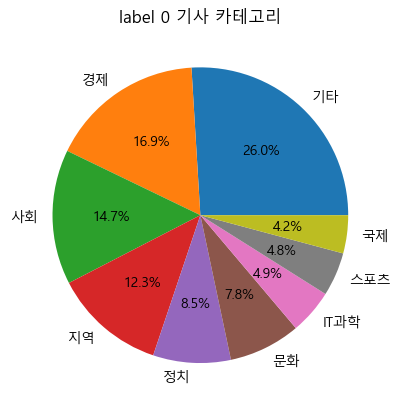

In [39]:
plt.pie(x = valuecounts_0, labels=valuecounts_0.keys(), autopct='%1.1f%%')
plt.title('label 0 기사 카테고리')

Text(0.5, 1.0, 'label 1 기사 카테고리')

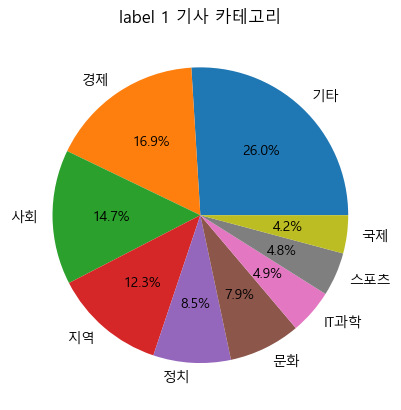

In [40]:
plt.pie(x = valuecounts_1, labels=valuecounts_1.keys(), autopct='%1.1f%%')
plt.title('label 1 기사 카테고리')

In [41]:
data_merge['label'].value_counts(1)

label
0    0.500188
1    0.499812
Name: proportion, dtype: float64

In [42]:
data_merge.to_csv('data_labeling.csv', index=False)

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('data_labeling.csv')

In [11]:
df[df['label']==0]

,doc_title,doc_contents,doc_class,label
0,"롯데하이마트, ‘보이는 ARS’ 결제 서비스 도입…국내 가전 유통업계 최초",롯데하이마트(대표 이동우)가 18일부터 전국 460여 개 매장에 ‘보이는 ARS’ ...,IT과학,0
1,"KMH그룹, 1분기 영업익 80% 증가… “계열사 실적 호조”",방송송출 전문기업 KMH그룹이 1분기 연결기준 매출액이 619억원으로 전년 동기 대...,IT과학,0
2,"롯데백화점, 중소 패션기업 재고 소진 돕기 위해 ‘상생 박람회’ 진행",롯데백화점은 신종 코로나바이러스 감염증(코로나19) 사태로 위축된 소비 심리를 활성...,IT과학,0
3,"'감염 급증' 카타르·쿠웨이트, 마스크 미착용에 징역형",카타르와 쿠웨이트가 외출 시 마스크를 쓰지 않으면 징역형과 수천만원의 벌금형에 처하...,국제,0
4,‘유방암’ 삼성반도체 노동자 산재 인정,삼성반도체 공장 퇴사 후 유방암에 걸린 노동자가 암 진단을 받은 지 13년 만에 산...,사회,0
...,...,...,...,...
19996,거리두기 2단계 시행 일주일 됐는데 환자 계속 증가 왜,정부가 수도권 지역에서 사회적 거리두기 2단계를 시행한 지 일주일이 지났지만 최근 ...,경제,0
19997,"3단계 격상땐…재택근무, 카페·학원 셧다운, 스포츠 올스톱","신종 코로나바이러스 감염증(코로나19) 확산세가 거세지자, 사회적 거리두기를 최고 ...",경제,0
19998,"서정협 ""민생 추락"" 정은경 ""매일 고민""…거리두기 3단계 촉각",서울 등 수도권에서 시작한 신종 코로나바이러스 감염증(코로나19) 집단감염이 전국으...,경제,0
19999,"집값급등 원인, 주부까지 탓한 추미애…秋자문단은 ""정부탓""","추미애 법무부 장관이 최근 집값 급등에 대해 ""정부 탓만이 아닌 투기세력 탓""이라고...",경제,0


## test data processing

In [43]:
data_ai = pd.read_csv('test_ai.csv', index_col=0)
data = pd.read_csv('test_nai.csv', index_col=0)

In [44]:
data_ai['label'] = 1
data['label'] = 0

In [45]:
data_ai = data_ai.rename(columns=
    {'title_ai': 'doc_title',
    'contents_ai':'doc_contents'})

In [46]:
data_merge = pd.concat([data,data_ai])

In [47]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15949 entries, 0 to 7948
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   doc_title     15949 non-null  object
 1   doc_contents  15949 non-null  object
 2   doc_class     15949 non-null  object
 3   label         15949 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 623.0+ KB


In [48]:
data_merge['doc_class'].unique()

array(['경제', '정치', '사회', '지역', '기타', '문화', '스포츠', 'IT과학', '국제', '내용 없음'],
      dtype=object)

In [49]:
data_merge.drop(data_merge[data_merge['doc_class'].isin(['내용 없음'])].index, inplace=True)

In [50]:
data_merge.dropna(inplace=True)

In [51]:
valuecounts_0 = data_merge[data_merge['label']==0]['doc_class'].value_counts()
valuecounts_1 = data_merge[data_merge['label']==1]['doc_class'].value_counts()

In [52]:
valuecounts_0.keys()

Index(['사회', '지역', '문화', '경제', '정치', '스포츠', '기타', '국제', 'IT과학'], dtype='object', name='doc_class')

In [53]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

Text(0.5, 1.0, 'label 0 기사 카테고리')

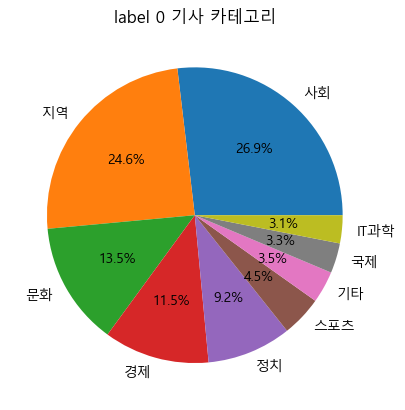

In [54]:
plt.pie(x = valuecounts_0, labels=valuecounts_0.keys(), autopct='%1.1f%%')
plt.title('label 0 기사 카테고리')

Text(0.5, 1.0, 'label 1 기사 카테고리')

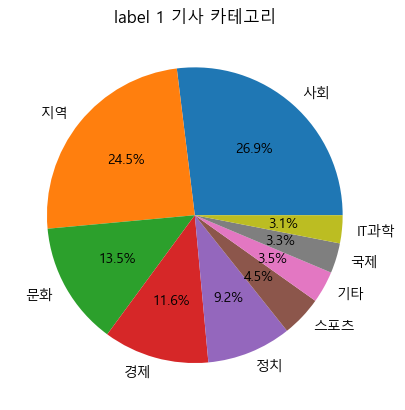

In [55]:
plt.pie(x = valuecounts_1, labels=valuecounts_1.keys(), autopct='%1.1f%%')
plt.title('label 1 기사 카테고리')

In [56]:
data_merge['label'].value_counts(1)

label
0    0.501599
1    0.498401
Name: proportion, dtype: float64

In [57]:
data_merge.to_csv('test_labeling.csv', index=False)

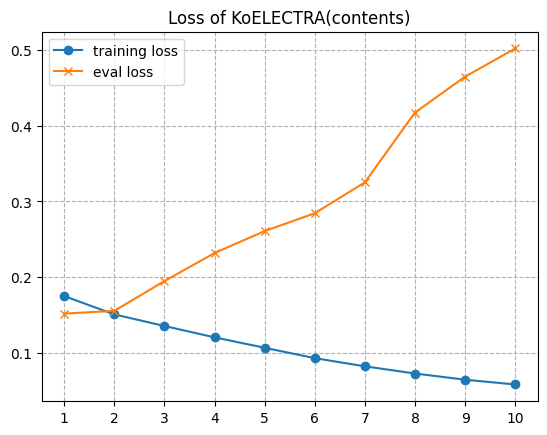

In [19]:
lossdata_contents_electra = pd.read_csv('lossdata_contents_electra.csv', index_col=False)
lossdata_contents_electra = lossdata_contents_electra[['epoch', 'train_loss_koelectra', 'eval_loss_koelectra']]
lossdata_contents_electra
plt.title('Loss of KoELECTRA(contents)')
plt.plot(lossdata_contents_electra['epoch'], lossdata_contents_electra['train_loss_koelectra'], marker = 'o')
plt.plot(lossdata_contents_electra['epoch'], lossdata_contents_electra['eval_loss_koelectra'], marker = 'x')
plt.xticks(lossdata_contents_electra['epoch'])
plt.grid(True, linestyle = '--')
plt.legend(('training loss', 'eval loss'))
plt.show()

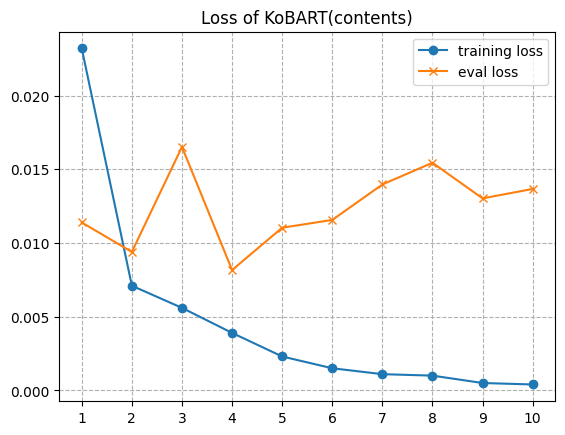

In [24]:
lossdata_contents_kobart = pd.read_csv('lossdata_contents_kobart.csv', index_col=False)
lossdata_contents_kobart = lossdata_contents_kobart[['epoch', 'train_loss_kobart', 'eval_loss_kobart']]
plt.title('Loss of KoBART(contents)')
plt.plot(lossdata_contents_kobart['epoch'], lossdata_contents_kobart['train_loss_kobart'], marker = 'o')
plt.plot(lossdata_contents_kobart['epoch'], lossdata_contents_kobart['eval_loss_kobart'], marker = 'x')
plt.xticks(lossdata_contents_kobart['epoch'])
plt.grid(True, linestyle = '--')
plt.legend(('training loss', 'eval loss'))
plt.show()

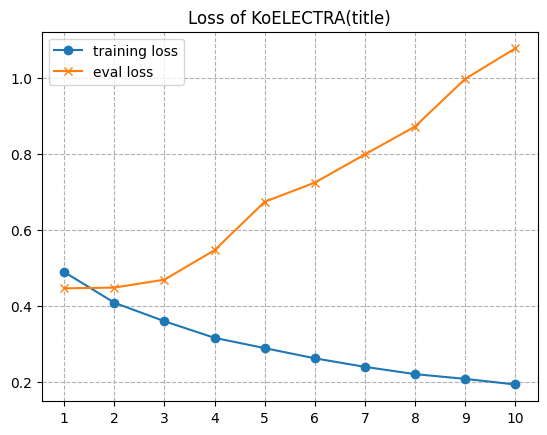

In [30]:
lossdata_electra = pd.read_csv('lossdata_electra.csv', index_col=False)
lossdata_electra = lossdata_electra[['epoch', 'train_loss_koelectra', 'eval_loss_koelectra']]
plt.title('Loss of KoELECTRA(title)')
plt.plot(lossdata_electra['epoch'], lossdata_electra['train_loss_koelectra'], marker = 'o')
plt.plot(lossdata_electra['epoch'], lossdata_electra['eval_loss_koelectra'], marker = 'x')
plt.xticks(lossdata_electra['epoch'])
plt.grid(True, linestyle = '--')
plt.legend(('training loss', 'eval loss'))
plt.show()

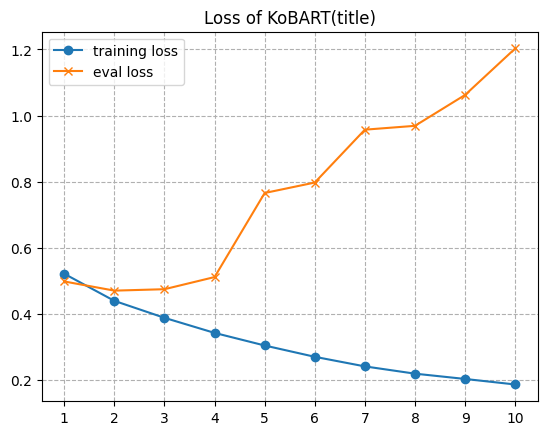

In [28]:
lossdata_title_kobart = pd.read_csv('lossdata_kobart.csv', index_col=False)
lossdata_title_kobart = lossdata_title_kobart[['epoch', 'train_loss_kobart', 'eval_loss_kobart']]
plt.title('Loss of KoBART(title)')
plt.plot(lossdata_title_kobart['epoch'], lossdata_title_kobart['train_loss_kobart'], marker = 'o')
plt.plot(lossdata_title_kobart['epoch'], lossdata_title_kobart['eval_loss_kobart'], marker = 'x')
plt.xticks(lossdata_title_kobart['epoch'])
plt.grid(True, linestyle = '--')
plt.legend(('training loss', 'eval loss'))
plt.show()

In [1]:
import pandas as pd

In [9]:
data

,doc_title,doc_contents,doc_class,label
0,"롯데하이마트, ‘보이는 ARS’ 결제 서비스 도입…국내 가전 유통업계 최초",롯데하이마트(대표 이동우)가 18일부터 전국 460여 개 매장에 ‘보이는 ARS’ ...,IT과학,0
1,"KMH그룹, 1분기 영업익 80% 증가… “계열사 실적 호조”",방송송출 전문기업 KMH그룹이 1분기 연결기준 매출액이 619억원으로 전년 동기 대...,IT과학,0
2,"롯데백화점, 중소 패션기업 재고 소진 돕기 위해 ‘상생 박람회’ 진행",롯데백화점은 신종 코로나바이러스 감염증(코로나19) 사태로 위축된 소비 심리를 활성...,IT과학,0
3,"'감염 급증' 카타르·쿠웨이트, 마스크 미착용에 징역형",카타르와 쿠웨이트가 외출 시 마스크를 쓰지 않으면 징역형과 수천만원의 벌금형에 처하...,국제,0
4,‘유방암’ 삼성반도체 노동자 산재 인정,삼성반도체 공장 퇴사 후 유방암에 걸린 노동자가 암 진단을 받은 지 13년 만에 산...,사회,0
...,...,...,...,...
39982,"코로나19 환자 계속 증가, 거리두기 2단계 시행 일주일",정부가 수도권 지역에서 사회적 거리두기 2단계를 시행한 지 일주일이 지났지만 최근 ...,경제,1
39983,"코로나19 3단계 격상 논의, 전문가들 촉구","신종 코로나바이러스 감염증(코로나19) 확산세가 거세지자, 사회적 거리두기를 최고 ...",경제,1
39984,"코로나19 확산 속 '사회적 거리두기' 3단계 촉각, 서정협과 정은경의 우려",신종 코로나바이러스 감염증(코로나19) 집단감염이 전국으로 확산하면서 '사회적 거리...,경제,1
39985,"집값 급등 논란, 추미애는 '정부 탓' 주부는 '투기세력 탓'",추미애 법무부 장관은 최근 집값 급등에 대해 '정부 탓만이 아닌 투기세력 탓'이라고...,경제,1


In [13]:
data = pd.read_csv('data_labeling.csv', index_col=False)
data_1 = data.iloc[0:10000]
data_2 = data.iloc[10001:15000]
data_3 = data.iloc[15001:20000]
data_4 = data.iloc[20001:30000]
data_5 = data.iloc[30001:]

In [14]:
data_list = [data_1, data_2, data_3, data_4, data_5] 

for i, df in enumerate(data_list, start=1):
    df.to_csv(f'data_for_training_{i}.csv', index=False)